Optimization terminated successfully.
         Current function value: 0.552135
         Iterations: 50
         Function evaluations: 98
Optimization terminated successfully.
         Current function value: 0.017484
         Iterations: 56
         Function evaluations: 109
Optimization terminated successfully.
         Current function value: 0.001935
         Iterations: 50
         Function evaluations: 96
Optimization terminated successfully.
         Current function value: 0.009187
         Iterations: 51
         Function evaluations: 99
CO(111): [-0.668  2.209]
CO(100): [-0.496  1.379]
CO(110): [-0.002  0.185]
CO(211): [-0.328  0.753]
Optimization terminated successfully.
         Current function value: 0.043558
         Iterations: 46
         Function evaluations: 85
Optimization terminated successfully.
         Current function value: 0.006961
         Iterations: 49
         Function evaluations: 93
Optimization terminated successfully.
         Current function value: 

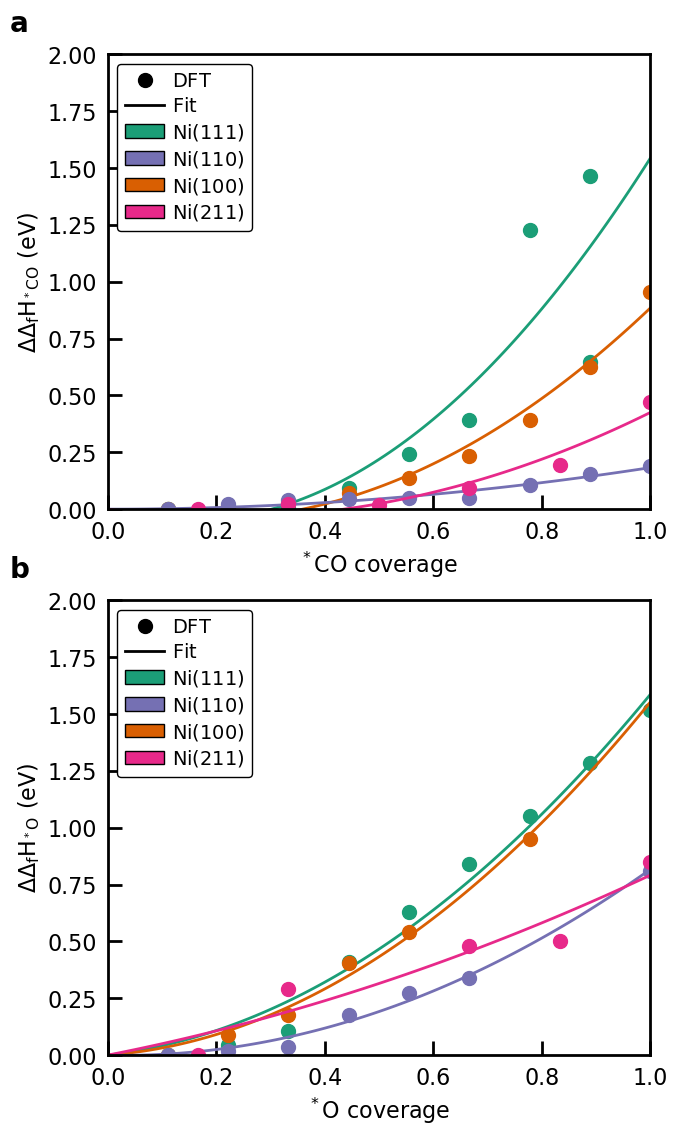

In [1]:
from scipy.optimize import fmin
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec

#Makes the diagrams look nice and shiny
plt.rcParams['figure.figsize']=(7,13)
plt.rcParams['axes.linewidth'] = 2
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=14)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)

colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]

def getSSE(slope1, slope2):
    square_residual = (slope1 - slope2)**2.0
    sum_square_error = sum(square_residual)
    return sum_square_error

#3rd-order polynomials
def fit3rd(params, theta):
    a, b, c = params
    BE = a*theta + b*theta**2 + c*theta**3
    return BE

def minimize_3rd(params, theta, BEs):
    BEs_predicted = fit3rd(params, theta)
    sse = getSSE(BEs_predicted, BEs)
    return sse

#3rd-order polynomials
def fit2nd(params, theta):
    a, b = params
    BE = a*theta + b*theta**2
    return BE

def minimize_2nd(params, theta, BEs):
    BEs_predicted = fit2nd(params, theta)
    sse = getSSE(BEs_predicted, BEs)
    return sse

#3rd-order polynomials
def fitlin(params, theta):
    a = params
    BE = a*theta
    return BE

def minimize_lin(params, theta, BEs):
    BEs_predicted = fitlin(params, theta)
    sse = getSSE(BEs_predicted, BEs)
    return sse

theta_co_111 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 8/9, 7/9, 8/9])
hcov_co_111=(np.array([-1.587,-1.581,-1.58,-1.495,-1.343,-1.194,-0.9415,-0.3616,-0.1236])--1.587)
scov_co_111=(np.array([0.04041,0.039,0.04057,0.04119,0.03542,0.03041,0.03109,0.02412,0.02142])-0.04041)/96.485

theta_co_100 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9, 9/9])
hcov_co_100=(np.array([-1.601,-1.587,-1.576,-1.532,-1.462,-1.366,-1.211,-0.9772,-0.6485])--1.601)
scov_co_100=(np.array([0.04517,0.04517,0.04413,0.04304,0.03991,0.03787,0.03589, 0.03162,0.02583])-0.04517)/96.485

theta_co_110 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9, 9/9])
hcov_co_110=(np.array([-1.621,-1.597,-1.582,-1.578,-1.572,-1.573,-1.515,-1.467,-1.432])--1.621)
scov_co_110=(np.array([0.04555,0.04794,0.0509,0.05094,0.04594,0.04244,0.04023,0.03924,0.0348])-0.04555)/96.485

theta_co_211 = np.array([1/6, 2/6, 3/6, 4/6, 5/6, 6/6])
hcov_co_211=(np.array([-1.558,-1.537,-1.542,-1.466,-1.365,-1.088])--1.558)
scov_co_211=(np.array([0.05915,0.0455,0.04257,0.03956,0.03704,0.03621])-0.05915)/96.485

theta_o_111 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9, 9/9])
hcov_o_111=(np.array([-5.318,-5.273,-5.211,-4.91,-4.69,-4.478,-4.269,-4.035,-3.802])--5.318)
scov_o_111=(np.array([0.01123,0.01123,0.0113,0.0106,0.01121,0.009554,0.009072,0.009072,0.01165])-0.01123)/96.485

theta_o_100 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 7/9])
hcov_o_100=(np.array([-5.647,-5.56,-5.472,-5.241,-5.105,-4.697])--5.647)
scov_o_100=(np.array([0.0155,0.0154,0.01508,0.01478,0.01526,0.01423])-0.0155)/96.485

theta_o_110 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 9/9])
hcov_o_110=(np.array([-5.173,-5.155,-5.137,-4.995,-4.902,-4.833,-4.362])--5.173)
scov_o_110=(np.array([0.01951,0.01903,0.02071,0.02017,0.02066,0.01989,0.02771])-0.01951)/96.485

theta_o_211 = np.array([1/6, 2/6, 4/6, 5/6, 6/6])
hcov_o_211=(np.array([-5.213,-4.921,-4.733,-4.711,-4.364])--5.213)
scov_o_211=(np.array([0.02025,0.02043,0.01254,0.01233,0.01213])-0.02025)/96.485

guess_2nd = (-2.0, 6.0)
h_co_111 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co_111, hcov_co_111))
h_co_100 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co_100, hcov_co_100))
h_co_110 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co_110, hcov_co_110))
h_co_211 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co_211, hcov_co_211))

print('CO(111):', np.round(h_co_111,3))
print('CO(100):', np.round(h_co_100,3))
print('CO(110):', np.round(h_co_110,3))
print('CO(211):', np.round(h_co_211,3))

h_o_111 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_o_111, hcov_o_111))
h_o_100 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_o_100, hcov_o_100))
h_o_110 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_o_110, hcov_o_110))
h_o_211 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_o_211, hcov_o_211))

print('O(111):', np.round(h_o_111,3))
print('O(100):', np.round(h_o_100,3))
print('O(110):', np.round(h_o_110,3))
print('O(211):', np.round(h_o_211,3))

poly_covs = np.linspace(0., 1., 101)
poly_hcov_co_111 = fit2nd(h_co_111, poly_covs)
poly_hcov_co_100 = fit2nd(h_co_100, poly_covs)
poly_hcov_co_110 = fit2nd(h_co_110, poly_covs)
poly_hcov_co_211 = fit2nd(h_co_211, poly_covs)

poly_hcov_o_111 = fit2nd(h_o_111, poly_covs)
poly_hcov_o_100 = fit2nd(h_o_100, poly_covs)
poly_hcov_o_110 = fit2nd(h_o_110, poly_covs)
poly_hcov_o_211 = fit2nd(h_o_211, poly_covs)

gs=gridspec.GridSpec(nrows=2, ncols=1)
gs.update(wspace=0.3, hspace=0.2)

import matplotlib.patches as mpatches
patch_Ni111=mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{Ni(111)}$')
patch_Ni110=mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{Ni(100)}$')
patch_Ni100=mpatches.Patch(facecolor=colors[2], edgecolor='k', label='$\mathrm{Ni(110)}$')
patch_Ni211=mpatches.Patch(facecolor=colors[3], edgecolor='k', label='$\mathrm{Ni(211)}$')

colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]

ax0=plt.subplot(gs[0,0])
ax1=plt.subplot(gs[1,0])

ax0.plot(theta_co_111, hcov_co_111, color=colors[0], marker='o', linestyle='none')
ax0.plot(poly_covs, poly_hcov_co_111, color=colors[0], linewidth=2)

ax0.plot(theta_co_100, hcov_co_100, color=colors[1], marker='o', linestyle='none')
ax0.plot(poly_covs, poly_hcov_co_100, color=colors[1], linewidth=2)

ax0.plot(theta_co_110, hcov_co_110, color=colors[2], marker='o', linestyle='none')
ax0.plot(poly_covs, poly_hcov_co_110, color=colors[2], linewidth=2)

ax0.plot(theta_co_211, hcov_co_211, color=colors[3], marker='o', linestyle='none')
ax0.plot(poly_covs, poly_hcov_co_211, color=colors[3], linewidth=2)

ax1.plot(theta_o_111, hcov_o_111, color=colors[0], marker='o', linestyle='none')
ax1.plot(poly_covs, poly_hcov_o_111, color=colors[0], linewidth=2)

ax1.plot(theta_o_100, hcov_o_100, color=colors[1], marker='o', linestyle='none')
ax1.plot(poly_covs, poly_hcov_o_100, color=colors[1], linewidth=2)

ax1.plot(theta_o_110, hcov_o_110, color=colors[2], marker='o', linestyle='none')
ax1.plot(poly_covs, poly_hcov_o_110, color=colors[2], linewidth=2)

ax1.plot(theta_o_211, hcov_o_211, color=colors[3], marker='o', linestyle='none')
ax1.plot(poly_covs, poly_hcov_o_211, color=colors[3], linewidth=2)

#dummys
ax0.plot(100, 100, color='k',marker='o', linewidth=2,linestyle='None', label='$\mathrm{DFT}$')
ax0.plot(100, 100, color='k',marker='None', linewidth=2,linestyle='solid', label='$\mathrm{Fit}$')

ax1.plot(100, 100, color='k',marker='o', linewidth=2,linestyle='None', label='$\mathrm{DFT}$')
ax1.plot(100, 100, color='k',marker='None', linewidth=2,linestyle='solid', label='$\mathrm{Fit}$')

handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles=[handles[0], handles[1],  patch_Ni111, patch_Ni100,patch_Ni110,patch_Ni211])

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=[handles[0], handles[1],  patch_Ni111, patch_Ni100,patch_Ni110,patch_Ni211])

ax0.set_ylabel('$\mathrm{\Delta\Delta_f H_{^*CO}\ (eV)}$')
ax0.set_ylim([0, 2])
ax0.set_xlim([0, 1])
ax0.set_xlabel('$\mathrm{^*CO\ coverage}$')

ax1.set_ylabel('$\mathrm{\Delta\Delta_f H_{^*O}\ (eV)}$')
ax1.set_ylim([0, 2])
ax1.set_xlim([0, 1])
ax1.set_xlabel('$\mathrm{^*O\ coverage}$')


import string 
ax0.text(-0.18, 1.05, string.ascii_lowercase[0], transform=ax0.transAxes, size=20, weight='bold')
ax1.text(-0.18, 1.05, string.ascii_lowercase[1], transform=ax1.transAxes, size=20, weight='bold')

plt.savefig('coverae_dependence_multifacet.pdf', transparent=False, bbox_inches='tight')
#plt.savefig('enthalpy_multifacet.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 51
         Function evaluations: 98
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 51
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 51
         Function evaluations: 96
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 56
         Function evaluations: 108
CO(111): [ 8.480e-05 -3.086e-04]
CO(100): [ 2.970e-05 -2.105e-04]
CO(110): [ 0.0001748 -0.0002934]
CO(211): [-0.000382   0.0001325]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 49
         Function evaluations: 92
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 48
         Function evaluations: 92
Optimization terminated successfully.
 

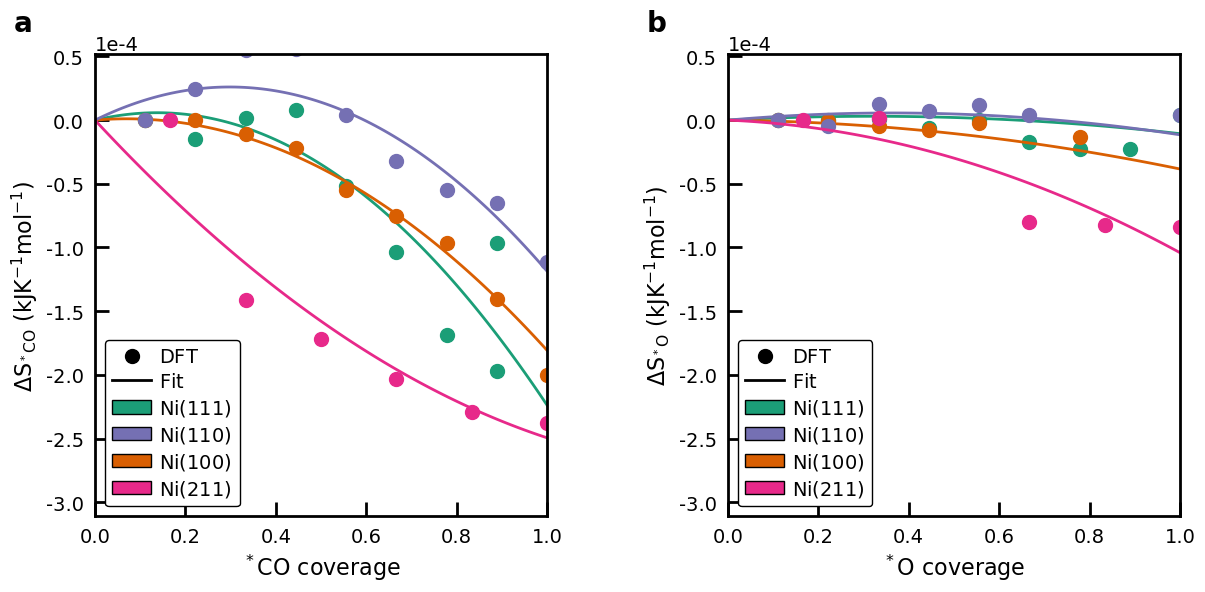

In [2]:
from scipy.optimize import fmin
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec

#Makes the diagrams look nice and shiny
plt.rcParams['figure.figsize']=(14,6)
plt.rcParams['axes.linewidth'] = 2
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=14)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)

colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]

def getSSE(slope1, slope2):
    square_residual = (slope1 - slope2)**2.0
    sum_square_error = sum(square_residual)
    return sum_square_error

#3rd-order polynomials
def fit3rd(params, theta):
    a, b, c = params
    BE = a*theta + b*theta**2 + c*theta**3
    return BE

def minimize_3rd(params, theta, BEs):
    BEs_predicted = fit3rd(params, theta)
    sse = getSSE(BEs_predicted, BEs)
    return sse

#3rd-order polynomials
def fit2nd(params, theta):
    a, b = params
    BE = a*theta + b*theta**2
    return BE

def minimize_2nd(params, theta, BEs):
    BEs_predicted = fit2nd(params, theta)
    sse = getSSE(BEs_predicted, BEs)
    return sse

#3rd-order polynomials
def fitlin(params, theta):
    a = params
    BE = a*theta
    return BE

def minimize_lin(params, theta, BEs):
    BEs_predicted = fitlin(params, theta)
    sse = getSSE(BEs_predicted, BEs)
    return sse


#These two fits are awful, add 

theta_o_110 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 9/9])
scov_o_110=(np.array([0.01951,0.01903,0.02071,0.02017,0.02066,0.01989,0.01989])-0.01951)/96.485

#theta_o_211 = np.array([1/9, 2/9, 4/9, 5/9, 6/9, 9/9])
#scov_o_211=(np.array([0.02025,0.02043,0.01254,0.01233,0.01213,0.01213])-0.02025)


theta_o_211 = np.array([1/6, 2/6, 4/6, 5/6, 6/6])
scov_o_211=(np.array([0.02025,0.02043,0.01254,0.01233,0.01213])-0.02025)/96.485

guess_2nd = (-2.0, 6.0)
guess_3rd = (-2.0, 6.0,1)
s_co_111 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co_111, scov_co_111))
s_co_100 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co_100, scov_co_100))
s_co_110 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co_110, scov_co_110))
s_co_211 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co_211, scov_co_211))

print('CO(111):', np.round(s_co_111,7))
print('CO(100):', np.round(s_co_100,7))
print('CO(110):', np.round(s_co_110,7))
print('CO(211):', np.round(s_co_211,7))

s_o_111 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_o_111, scov_o_111))
s_o_100 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_o_100, scov_o_100))
s_o_110 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_o_110, scov_o_110))
s_o_211 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_o_211, scov_o_211))

print('O(111):', np.round(s_o_111,7))
print('O(100):', np.round(s_o_100,7))
print('O(110):', np.round(s_o_110,7))
print('O(211):', np.round(s_o_211,7))

poly_covs = np.linspace(0., 1., 101)
poly_scov_co_111 = fit2nd(s_co_111, poly_covs)
poly_scov_co_100 = fit2nd(s_co_100, poly_covs)
poly_scov_co_110 = fit2nd(s_co_110, poly_covs)
poly_scov_co_211 = fit2nd(s_co_211, poly_covs)

poly_scov_o_111 = fit2nd(s_o_111, poly_covs)
poly_scov_o_100 = fit2nd(s_o_100, poly_covs)
poly_scov_o_110 = fit2nd(s_o_110, poly_covs)
poly_scov_o_211 = fit2nd(s_o_211, poly_covs)

gs=gridspec.GridSpec(nrows=1, ncols=2)
gs.update(wspace=0.4, hspace=0.2)

import matplotlib.patches as mpatches
patch_Ni111=mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{Ni(111)}$')
patch_Ni110=mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{Ni(100)}$')
patch_Ni100=mpatches.Patch(facecolor=colors[2], edgecolor='k', label='$\mathrm{Ni(110)}$')
patch_Ni211=mpatches.Patch(facecolor=colors[3], edgecolor='k', label='$\mathrm{Ni(211)}$')

colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]

ax0=plt.subplot(gs[0,0])
ax1=plt.subplot(gs[0,1])

ax0.plot(theta_co_111, scov_co_111, color=colors[0], marker='o', linestyle='none')
ax0.plot(poly_covs, poly_scov_co_111, color=colors[0], linewidth=2)

ax0.plot(theta_co_100, scov_co_100, color=colors[1], marker='o', linestyle='none')
ax0.plot(poly_covs, poly_scov_co_100, color=colors[1], linewidth=2)

ax0.plot(theta_co_110, scov_co_110, color=colors[2], marker='o', linestyle='none')
ax0.plot(poly_covs, poly_scov_co_110, color=colors[2], linewidth=2)

ax0.plot(theta_co_211, scov_co_211, color=colors[3], marker='o', linestyle='none')
ax0.plot(poly_covs, poly_scov_co_211, color=colors[3], linewidth=2)

ax1.plot(theta_o_111, scov_o_111, color=colors[0], marker='o', linestyle='none')
ax1.plot(poly_covs, poly_scov_o_111, color=colors[0], linewidth=2)

ax1.plot(theta_o_100, scov_o_100, color=colors[1], marker='o', linestyle='none')
ax1.plot(poly_covs, poly_scov_o_100, color=colors[1], linewidth=2)

ax1.plot(theta_o_110, scov_o_110, color=colors[2], marker='o', linestyle='none')
ax1.plot(poly_covs, poly_scov_o_110, color=colors[2], linewidth=2)

ax1.plot(theta_o_211, scov_o_211, color=colors[3], marker='o', linestyle='none')
ax1.plot(poly_covs, poly_scov_o_211, color=colors[3], linewidth=2)

#dummys
ax0.plot(100, 100, color='k',marker='o', linewidth=2,linestyle='None', label='$\mathrm{DFT}$')
ax0.plot(100, 100, color='k',marker='None', linewidth=2,linestyle='solid', label='$\mathrm{Fit}$')

ax1.plot(100, 100, color='k',marker='o', linewidth=2,linestyle='None', label='$\mathrm{DFT}$')
ax1.plot(100, 100, color='k',marker='None', linewidth=2,linestyle='solid', label='$\mathrm{Fit}$')

handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles=[handles[0], handles[1],  patch_Ni111, patch_Ni100,patch_Ni110,patch_Ni211])

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=[handles[0], handles[1],  patch_Ni111, patch_Ni100,patch_Ni110,patch_Ni211])

ax0.set_ylabel('$\mathrm{\Delta S_{^*CO}\ (kJK^{-1}mol^{-1})}$')
ax0.set_ylim([-30/1000/96.485, 5/1000/96.485])
ax0.set_xlim([0, 1])
ax0.set_xlabel('$\mathrm{^*CO\ coverage}$')

ax1.set_ylabel('$\mathrm{\Delta S_{^*O}\ (kJK^{-1}mol^{-1})}$')
ax1.set_ylim([-30/1000/96.485, 5/1000/96.485])
ax1.set_xlim([0, 1])
ax1.set_xlabel('$\mathrm{^*O\ coverage}$')


import string 
ax0.text(-0.18, 1.05, string.ascii_lowercase[0], transform=ax0.transAxes, size=20, weight='bold')
ax1.text(-0.18, 1.05, string.ascii_lowercase[1], transform=ax1.transAxes, size=20, weight='bold')

plt.savefig('coverage_dependence_multifacet_entropy.pdf', transparent=False, bbox_inches='tight')
#plt.savefig('entropy_multifacet.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()
